## Ejercicios de pair programming 20 enero: Normalización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro
import math
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,philippines,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,solomon islands,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [3]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,philippines,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,solomon islands,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [4]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,papua new guinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0
1,madagascar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0
2,afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0
3,niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0
4,gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

### Normalización de la variable respuesta

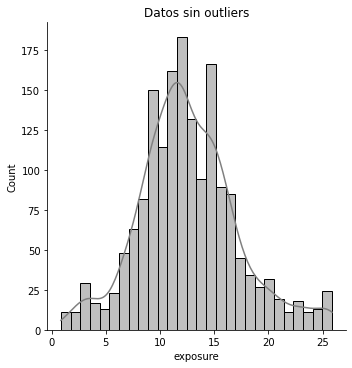

In [5]:
#Vemos representado graficamente la distribución de nuestro df sin outliers
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

A la vista de la gráfica hemos pensado que el método de raiz cuadrada podría servir para normalizar la variable respuesta.

In [6]:
df_limpio['exposure_RAIZ'] = df_limpio['exposure'].apply(lambda x: math.sqrt(x))

In [7]:
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_RAIZ
0,papua new guinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0,4.822862
1,madagascar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0,4.547527
2,afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,4.295346
3,niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0,4.300000
4,gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0,4.711688


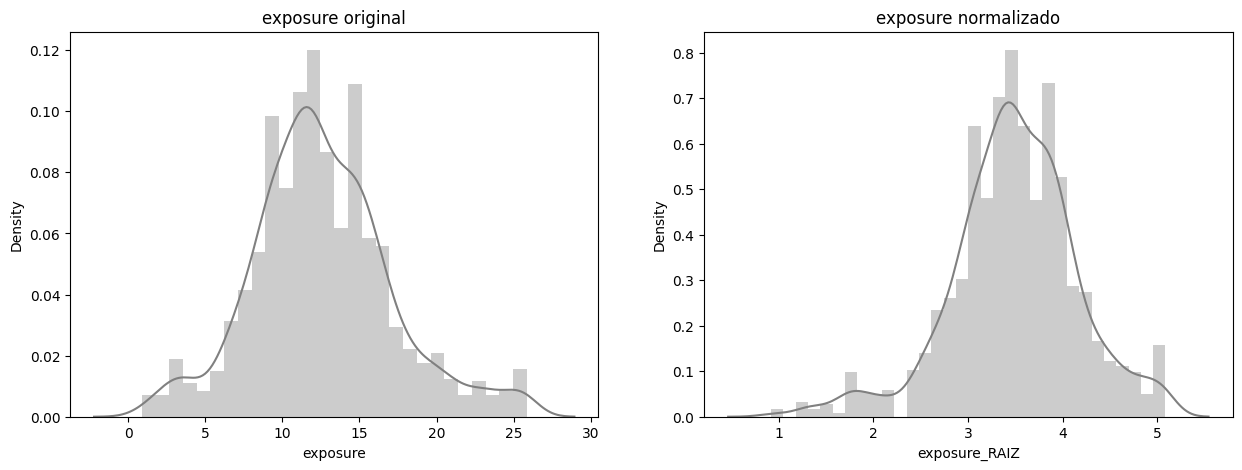

In [8]:
#Vemos representados los cambios
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0],  color = "grey")
sns.distplot(df_limpio["exposure_RAIZ"], ax = axes[1],  color = "grey");

In [9]:
#Probamos el test de saphiro vara ver si se ha normalizado
stats.shapiro(df_limpio['exposure_RAIZ'])

ShapiroResult(statistic=0.9764959812164307, pvalue=4.163925559638271e-16)

El método de raiz cuadrada no ha normalizado nuestra variable respuesta. Vamos probar BoxCox.

In [10]:
#Probamos con el método de BoxCox
df_limpio['exposure_BOX'], lambda_ajustada = stats.boxcox(df_limpio['exposure'])

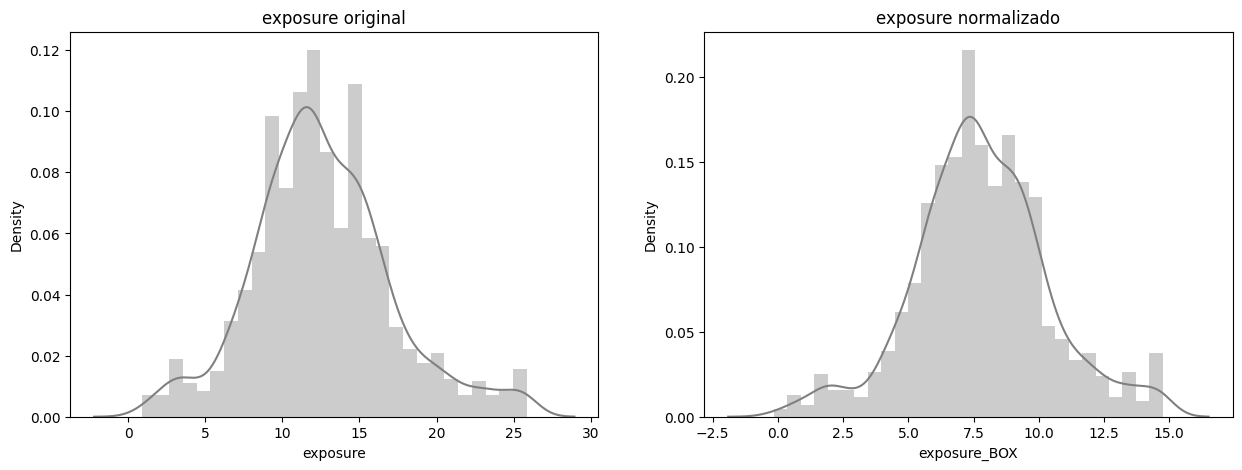

In [11]:
#Vemos representado graficamente
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0],  color = "grey")
sns.distplot(df_limpio["exposure_BOX"], ax = axes[1],  color = "grey");

In [12]:
#Probamos el test de saphiro vara ver si se ha normalizado
stats.shapiro(df_limpio['exposure_BOX'])

ShapiroResult(statistic=0.9866284132003784, pvalue=1.760636254843906e-11)

Con BoxCox tampoco hemos conseguido normalizar la variable respuesta. Probamos a través del método de MinMaxScaler Sklearn

In [13]:
numericas = df_limpio.select_dtypes(include = np.number) #Seleccionamos las variables numericas

minmax = MinMaxScaler() #Iniciamos el método y lo aplicamos a la variable respuesta
minmax.fit(df_limpio[['exposure']])

X_normalizadas = minmax.transform(df_limpio[["exposure"]])
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["exposure_Sklearn"]) 

df_limpio["exposure_Sklearn"] = numericas_minmax #Unimos la columna normalizada a nuestro df

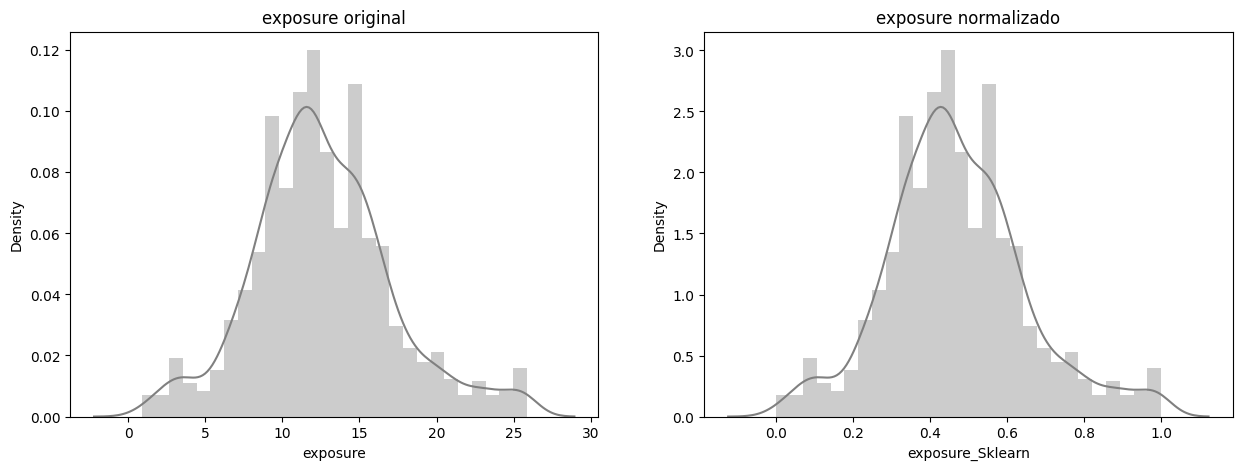

In [14]:
#Lo vemos representado graficamente
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0],  color = "grey")
sns.distplot(df_limpio["exposure_Sklearn"], ax = axes[1], color = "grey");

In [15]:
#Comprobamos con el test de saphiro
stats.shapiro(df_limpio['exposure_Sklearn'])

ShapiroResult(statistic=0.9806538820266724, pvalue=2.0626898897691676e-14)

Hemos conseguido normalizar nuestra variable respuesta con Sklearn ya que el p valor es menor de 0.05.

In [16]:
df_limpio.drop(['exposure_RAIZ', 'exposure_BOX'], axis =1, inplace = True) #Eliminamos las columnas que no han normalizado la variable respuesta

In [17]:
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,papua new guinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0,0.895683
1,madagascar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0,0.792566
2,afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,0.703437
3,niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0,0.705036
4,gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0,0.853317


### Normalización de nuestro df Outliers

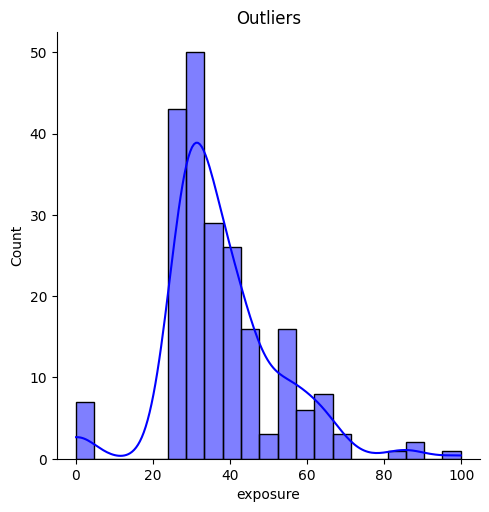

In [18]:
#Lo vemos representado graficamente
sns.displot(outliers["exposure"], kde = True, color = "blue")
plt.title('Outliers');

In [19]:
#Probamos con BoxCox
outliers['exposure_BOX'], lambda_ajustada = stats.boxcox(outliers['exposure'])

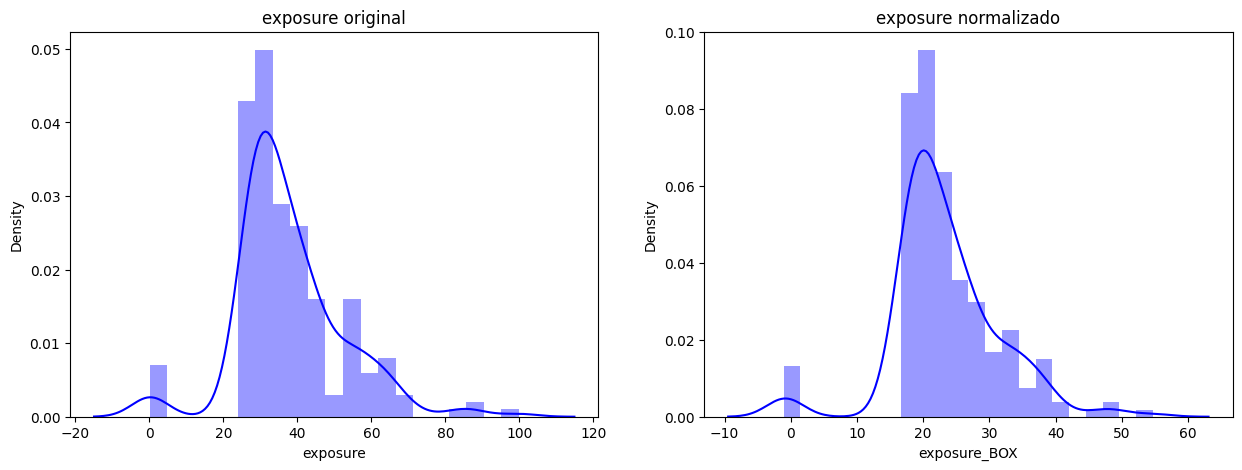

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(outliers['exposure'] ,ax = axes[0], color = "blue")
sns.distplot(outliers["exposure_BOX"], ax = axes[1], color = "blue");

In [21]:
stats.shapiro(outliers['exposure_BOX']) #No consigue normalizar

ShapiroResult(statistic=0.8956608176231384, pvalue=5.94319593538728e-11)

In [22]:
#Probamos con MinMaxScaler
numericas = outliers.select_dtypes(include = np.number)

minmax = MinMaxScaler()
minmax.fit(outliers[['exposure']])

X_normalizadas = minmax.transform(outliers[["exposure"]])
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["exposure_Sklearn"])

outliers["exposure_Sklearn"] = numericas_minmax

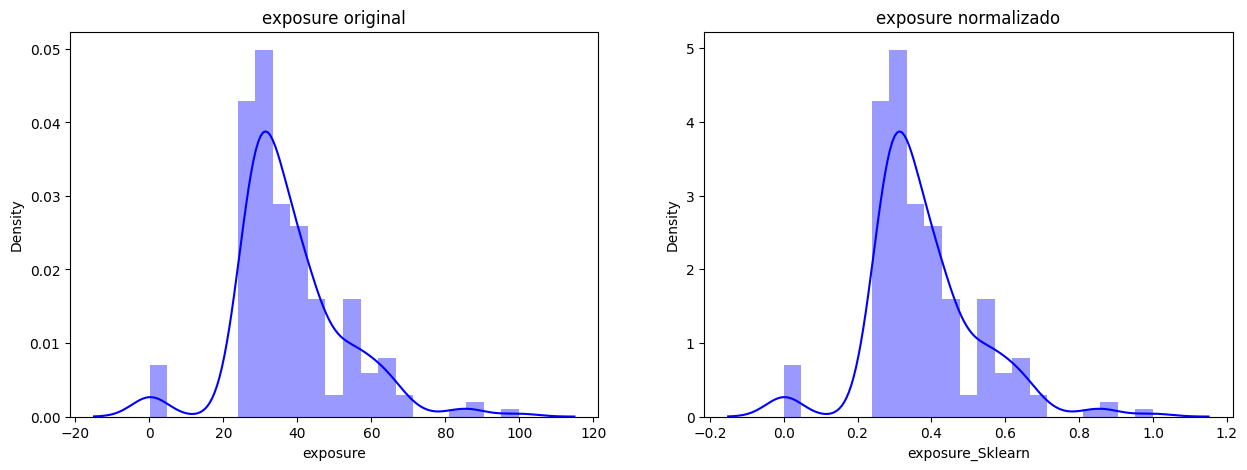

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(outliers['exposure'] ,ax = axes[0], color = "blue")
sns.distplot(outliers["exposure_Sklearn"], ax = axes[1], color = "blue");

In [24]:
stats.shapiro(outliers['exposure_Sklearn'])

ShapiroResult(statistic=0.8976998329162598, pvalue=8.014527930200188e-11)

Para el df de outliers también hemos conseguido normalizar con sklearn

In [25]:
outliers.drop(['exposure_BOX'], axis =1, inplace = True) #eliminamos la columna del BoxCox

In [26]:
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0,0.563758
1,tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0,0.560853
2,philippines,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0,0.451167
3,solomon islands,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0,0.364119
4,guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0,0.384353


In [27]:
#Guardamos los nuevos df con la columna nomalizada
df_limpio.to_csv('../datos/world_risk_index_sin_outliers_norm.csv')

In [28]:
outliers.to_csv('../datos/world_risk_index_outliers_norm.csv')